In [1]:
import random
import numpy as np
from scipy.io  import loadmat
import matplotlib.pyplot as plt
import math
aa = loadmat('Hmatrix.mat')
result = aa.items()
data = list(result)
HH = np.array(data)
print(HH.shape)
H = HH[3][1]

(4, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [2]:
'''def bsc(aa,p):
  a = np.copy(aa)
  l = len(a)
  n=int(round(p*l,0))
  s = random.sample(range(0,l),n)
  #print(s)
  for i in s:
    a[i] = (a[i]+1)%2
  return a'''

def bsc(b,p):
  a = b.copy() 
  for i in range(0,len(a)):
    t = random.random()
    if t <= p:
      a[i] = (a[i] + 1) % 2
  return a

def rat(i):
  if i==1:
    i = 0.999999999
  if i==0:
    i = 0.000000001
  return i/(1-i)

def c2v(aa,ii):  
  aa = np.delete(aa,ii) 
  length = len(aa)
  sum = 1
  for i in range(length):
    sum = sum * ( 2*aa[i] - 1)
  sum = (sum / 2) + 0.5
  return sum

4 3
3792
5056
ch =  [[  57  100  206  260]
 [  58  101  207  261]
 [  59  102  208  262]
 ...
 [1244 2464 3769 5046]
 [1245 2465 3770 5047]
 [1246 2466 3771 5048]]
var =  [[  22 1274 2566]
 [  23 1275 2567]
 [  24 1276 2568]
 ...
 [1191 2459 3717]
 [1192 2460 3718]
 [1193 2461 3719]]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [1. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 1. 0.]
AC=  [0. 0. 0. ... 0. 1. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 1. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 1. 0. 1.]
AC=  [0. 0. 0. ... 1. 0. 0.]
AC=  [0. 1. 0. ... 0. 0. 0.]
AC=  [0. 0. 0. ... 

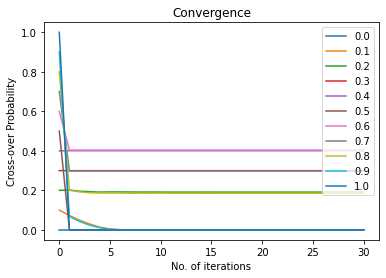

In [6]:
'''
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
            [0,0,1,1,0,0,0,0,1,0,0,1]])
H = np.array([[ 0, 1, 0, 1, 1, 0, 0, 1],[1, 1, 1, 0, 0, 1, 0, 0],[0, 0, 1, 0, 0, 1, 1, 1],[1, 0, 0, 1, 1, 0, 1, 0]])
print(H)'''

dc = dv = 0

for a in H[0]:
  if a==1:
    dc = dc + 1

for na in H[:,0]:
  if na==1:
    dv = dv+1

print(dc,dv)
row = H.shape[0]
print(row)
col = H.shape[1]
print(col)

ch = np.array([[-1 for i in range(dc)] for j in range(row)])
var = np.array([[-1 for i in range(dv)] for j in range(col)])

for i in range(0,row):
  k = 0
  for j in range(0,col):
    if H[i][j] == 1:
      ch[i][k] = j;
      k = k+1
      for m in range(dv):
        if var[j][m] == -1:
          var[j][m] = i
          break

print('ch = ',ch)
print('var = ',var)

prob = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

arr = np.zeros((11,31))
nsim = 10
for i in range(0,11):
  arr[i,0] = prob[i]*nsim

for gg in range(0,11):
  p = prob[gg]
  for Nsim in range(0,nsim):     #Monte-Carlo simulations
    C = np.zeros((col))       #codeword
    AC = bsc(C,p)             #after passing it through the BSC
    print('AC= ',AC)

    acp=np.zeros((col))         
    for i in range(0,col):    #loading the VNs for the 1st iteration with prob.
      if AC[i]==1:
        acp[i] = 1-p
      else:
        acp[i] = p

    cs = np.zeros((row,dc))

    for i in range(0,row):    #sending prob. from VN to CN
      for j in range(0,dc):
        cs[i][j] = acp[ch[i][j]]


    ansp = np.array([-1]*col)         #array to store the calculated codeword after each iteration

    for u in range(0,30):             #assuming max. number of iterations required to decode correctly is 30
      cc = np.zeros((row,dc))         #matrix to store the calculated values of SPC decoding
      for i in range(0,row):
        for j in range(0,dc):
          cc[i][j] = c2v(cs[i],j)     #calculating the prob. of VN_i to become 1 using SPC decoding


      vs = np.zeros((col,dv))         #matrix to store the values given by CN_j to VN_i

      for i in range(0,col):          #msg passing from CN to VN
        for j in range(0,dv):
          ii = var[i][j]
          for k in range(0,dc):
            if ch[ii][k] == i:
              break
          vs[i][j] = cc[ii][k]

      ans=np.zeros((col))

      for i in range(0,col):                    #for each VN
          ans[i] = rat(acp[i])
          for j in range(0,dv):                 #for each corresponding connected CN
            ans[i] = ans[i] * rat(vs[i][j])
          if ans[i]>=1:                         #estimating the answer
            ans[i] = 1
          else:
            ans[i] = 0

      '''if (ans == ansp).all():               #termination if answer calculated in this iteration is equal to answer calculated in previous iteration
        break'''
      temp=0
      for b in range(0,row):                   #alternate termination step
        sum=0
        for c in range(0,dc):
          sum=sum+ans[ch[b][c]]
        if sum%2!=0:
          temp=1
          break
        else:
          temp=0
      if temp==0:
        break
      ansp = ans

      vc = np.zeros((col,dv))               #matrix to store calculated values for each CN 

      for i in range(0,col):                #calculating prob. for VN to CN 
        for j in range(0,dv):
          num = acp[i]                      #P(X=1|Y) from the channel
          deno = 1-acp[i]                   #P(X=0|Y) from the channel
          for k in range(0,dv):
            if k==j:                        #not considering the value of CN_j while sending it to itself (it is similar to positive feedback)
              continue
            else:
              num = num * vs[i][k]
              deno = deno * (1-vs[i][k])
          vc[i][j] = num/(num+deno)         #here num+deno signifies value of normalizing constant alpha

      for i in range(0,row):                #msg passing from VN to CN for (t+1)th iteration
        for j in range(0,dc):
          ii = ch[i][j]
          for k in range(0,dv):
            if var[ii][k] == i:
              break
          cs[i][j] = vc[ii][k]
    

      no_err = 0
      for i in range(0,col):
          if ans[i] != C[i]:
            no_err = no_err + 1
      arr[gg,u+1] = arr[gg,u+1] + no_err/col
    
arr = arr/nsim                                #dividing by Nsim
print('arr = ',arr)

for i in range(0,11):
  plt.plot(range(0,31),arr[i,:])

plt.title('Convergence')
plt.xlabel('No. of iterations')
plt.ylabel('Cross-over Probability')
plt.legend(prob)